- The outputs from the pest analysis is analyzed here. The following notebook provides a template for future notebooks.

File name - Case1_B_glm_rw_restart2.demo {Simulation is carried out with 20 parameters (10 for each material) }

1. Self-analysis (with inspiration from PEST-related articles, PESTools, PyEMU) - - Check from Pg. 100 - pestpp.5.0.8_manual.pdf
    - Input data
    - Sensitivity
    - Objective function
    - Residuals
    - Relative contribution of temperature and moisture on the objective function
    - Identifibility tool (TODO)
    - Covariance matrix (TODO)

In [1]:
import sys
sys.path.insert(0,'../pestools')

In [2]:
import os
main_cwd = os.getcwd()
print(main_cwd)

/home/rk/pestpp/pestpp/rk_model_final_4yrs


In [3]:
import pestools

In [4]:
from matplotlib.ticker import MaxNLocator
#import parsen

/home/rk/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [5]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import matplotlib.gridspec as gridspec

/home/rk/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [6]:
import warnings
warnings.filterwarnings('ignore')

/home/rk/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


### 1. Self-analysis (with inspiration from PEST-related articles, PESTools, PyEMU)
#### a. Started with accessing the input data

In [21]:
directory_name = 'Case5_I_cv_start.demo'
cf_name = 'Case5_I_cv_cf_v1' # Control file name

#### Accessing the objective function with every iteration 

In [22]:
#res_start = pd.read_csv('Case5_III_C_glm_start.demo/Case5_III_C_glm_cf_v1.res',delim_whitespace=True)
#res_start.head()

In [23]:
res_start = pd.read_csv(f'{directory_name}/{cf_name}.rei',delim_whitespace=True, skiprows=2)
res_start.head()

,Name,Group,Measured,Modelled,Residual,Weight
0,stemp_0.04_0,temp,260.6422,270.1500,-9.507847,0.000065
1,stemp_0.04_1,temp,261.2884,269.0190,-7.730610,0.000065
2,stemp_0.04_2,temp,261.3255,267.4623,-6.136787,0.000065
3,stemp_0.04_3,temp,261.1522,266.1308,-4.978609,0.000065
4,stemp_0.04_4,temp,260.7784,264.5629,-3.784464,0.000065


In [30]:
temp_measured = res_start.iloc[:np.int(len(res_start)/2),2] # The 2nd column contains the measured values and we have only temperature values from the first half of the values
mois_measured = res_start.iloc[np.int(len(res_start)/2):,2]

temp_sim = res_start.iloc[:np.int(len(res_start)/2),3] # The 3rd column contains the simulated values 
mois_sim = res_start.iloc[np.int(len(res_start)/2):,3]

temp_res = res_start.iloc[:np.int(len(res_start)/2),4] # The 4th column contains the residual values 
mois_res = res_start.iloc[np.int(len(res_start)/2):,4]

In [32]:
res_start.iloc[:np.int(len(res_start)/(2*7)),:].tail()

,Name,Group,Measured,Modelled,Residual,Weight
1091,stemp_0.04_1091,temp,257.3359,259.5321,-2.196157,0.000065
1092,stemp_0.04_1092,temp,257.1298,257.7156,-0.585808,0.000065
1093,stemp_0.04_1093,temp,256.7739,257.2971,-0.523206,0.000065
1094,stemp_0.04_1094,temp,256.4260,258.3804,-1.954387,0.000065
1095,stemp_0.04_1095,temp,256.6415,260.7180,-4.076466,0.000065


Text(0.5, 0, 'Days')

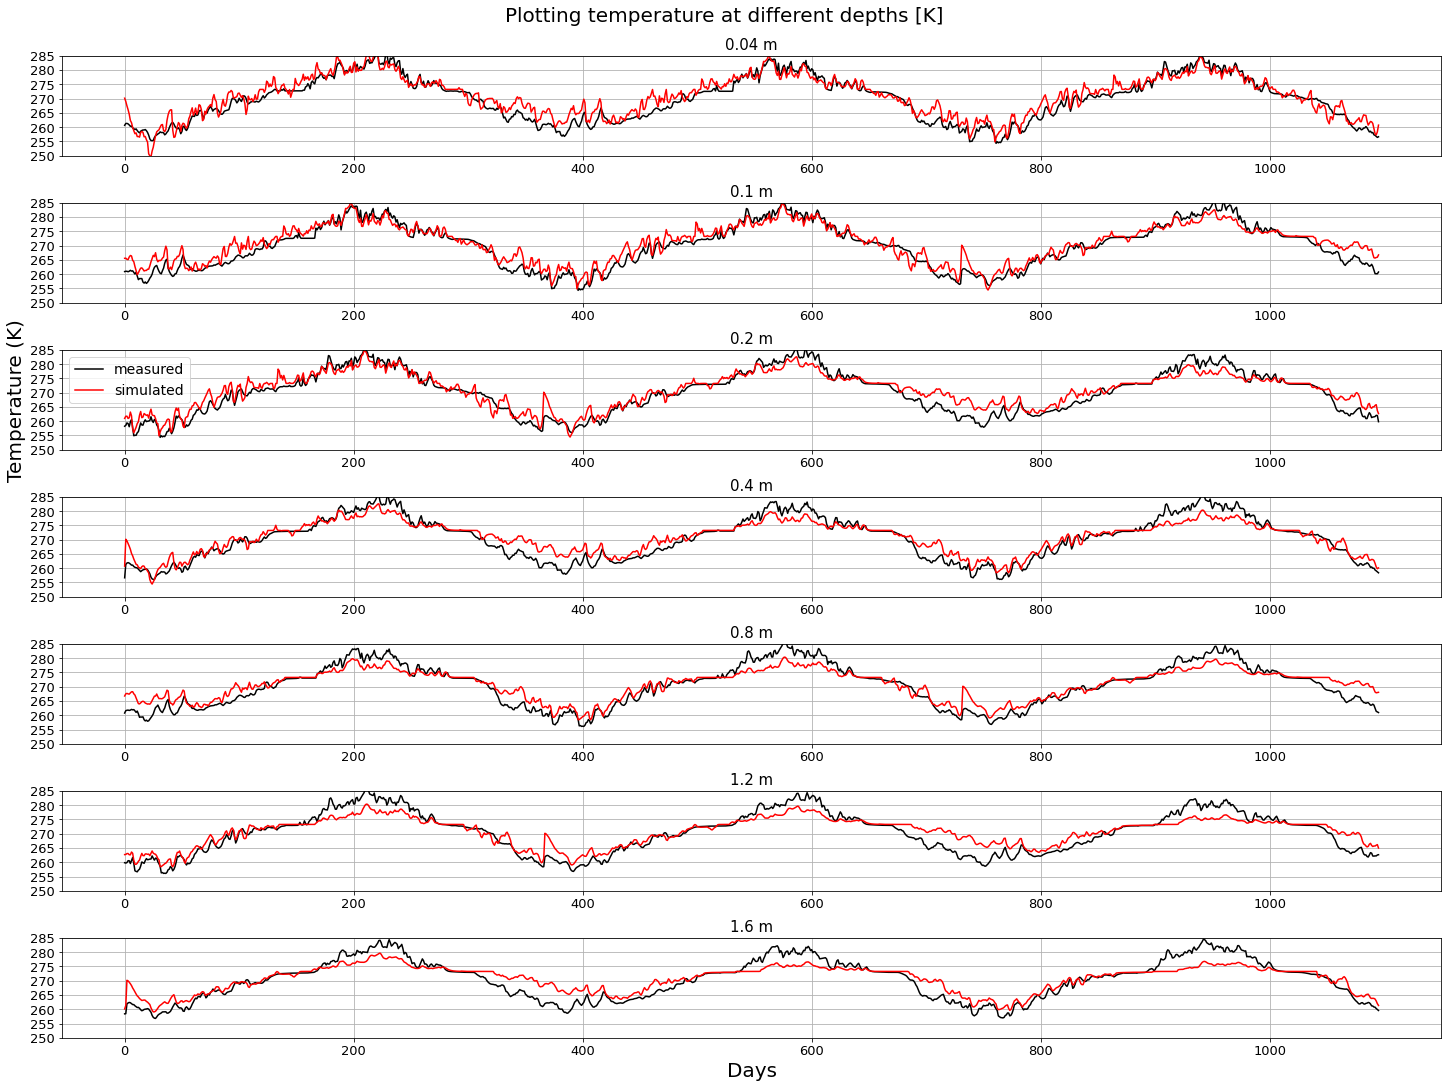

In [34]:
### Plotting the final results (mesured vs simulated) along with the parameters:
### Plotting the temperature for different alpha values at depth 0.01 m
fig2 = plt.figure(figsize=(20,15), constrained_layout=True)
spec2 = gridspec.GridSpec(ncols=1, nrows=7, height_ratios=[1,1,1,1,1,1,1], figure=fig2)
f2_ax1 = fig2.add_subplot(spec2[0, 0])
f2_ax2 = fig2.add_subplot(spec2[1, 0])
f2_ax3 = fig2.add_subplot(spec2[2, 0])
f2_ax4 = fig2.add_subplot(spec2[3, 0])
f2_ax5 = fig2.add_subplot(spec2[4, 0])
f2_ax6 = fig2.add_subplot(spec2[5, 0])
f2_ax7 = fig2.add_subplot(spec2[6, 0])

fig2.suptitle(f'Plotting temperature at different depths [K]', fontsize=20)


depths = [0.04, 0.1, 0.2, 0.4, 0.8, 1.2, 1.6]

time_period = np.arange(0,1096)

x = 0

for j, depth in enumerate(depths):
    locals()['f2_ax'+str(j+1)].plot(time_period, temp_measured[x:x+1096].values, 'k', label='measured')
    locals()['f2_ax'+str(j+1)].plot(time_period, temp_sim[x:x+1096].values, 'r', label='simulated')
    locals()['f2_ax'+str(j+1)].set_title(f'{depth} m', fontsize=15)
    locals()['f2_ax'+str(j+1)].grid(True)
    #locals()['f2_ax'+str(j+1)].legend(fontsize=14)
    locals()['f2_ax'+str(j+1)].set_ylim(250,285)
    
    x = x + 365

    for label in (locals()['f2_ax'+str(j+1)].get_xticklabels() + locals()['f2_ax'+str(j+1)].get_yticklabels()):
        label.set_fontsize(13)
        
f2_ax3.legend(fontsize=14)  
f2_ax3.set_ylabel('Temperature (K)', fontsize=20)
f2_ax7.set_xlabel('Days', fontsize=20)

Text(0.5, 0, 'Days')

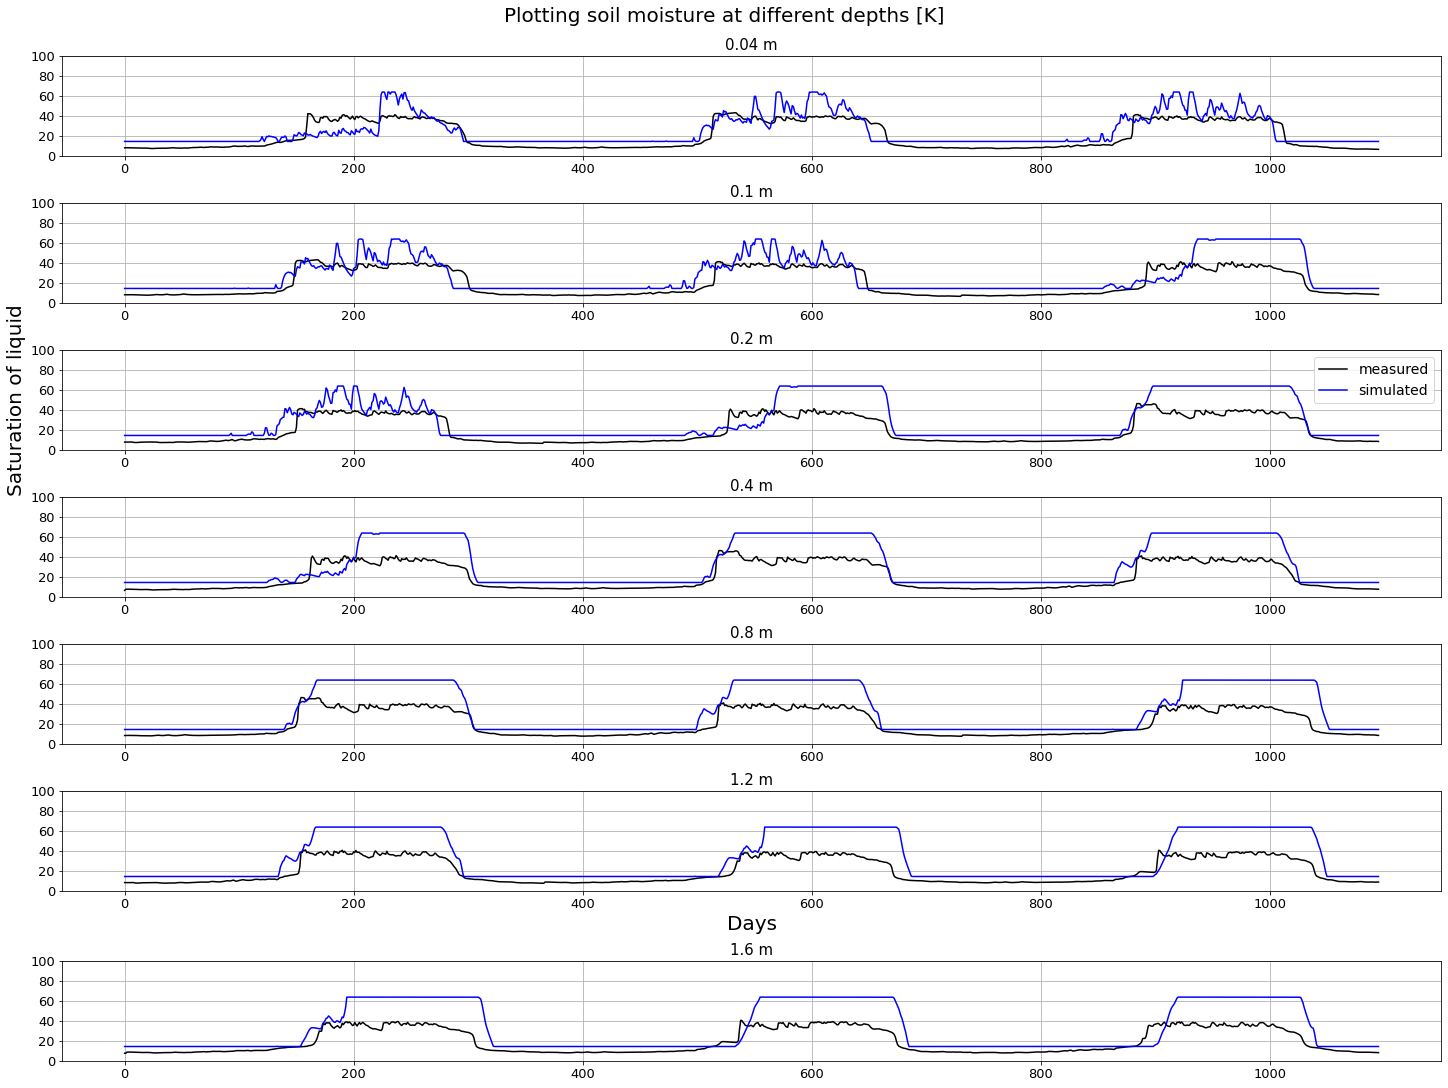

In [35]:
### Plotting the final results (mesured vs simulated) along with the parameters:
### Plotting the temperature for different alpha values at depth 0.01 m
fig2 = plt.figure(figsize=(20,15), constrained_layout=True)
spec2 = gridspec.GridSpec(ncols=1, nrows=7, height_ratios=[1,1,1,1,1,1,1], figure=fig2)
f2_ax1 = fig2.add_subplot(spec2[0, 0])
f2_ax2 = fig2.add_subplot(spec2[1, 0])
f2_ax3 = fig2.add_subplot(spec2[2, 0])
f2_ax4 = fig2.add_subplot(spec2[3, 0])
f2_ax5 = fig2.add_subplot(spec2[4, 0])
f2_ax6 = fig2.add_subplot(spec2[5, 0])
f2_ax7 = fig2.add_subplot(spec2[6, 0])

fig2.suptitle(f'Plotting soil moisture at different depths [K]', fontsize=20)


depths = [0.04, 0.1, 0.2, 0.4, 0.8, 1.2, 1.6]

time_period = np.arange(0,1096)

x = 0

for j, depth in enumerate(depths):
    locals()['f2_ax'+str(j+1)].plot(time_period, mois_measured[x:x+1096].values, 'k', label='measured')
    locals()['f2_ax'+str(j+1)].plot(time_period, mois_sim[x:x+1096].values, 'b', label='simulated')
    locals()['f2_ax'+str(j+1)].set_title(f'{depth} m', fontsize=15)
    locals()['f2_ax'+str(j+1)].grid(True)
    #locals()['f2_ax'+str(j+1)].legend(fontsize=14)
    locals()['f2_ax'+str(j+1)].set_ylim(0,100)
    
    x = x + 365

    for label in (locals()['f2_ax'+str(j+1)].get_xticklabels() + locals()['f2_ax'+str(j+1)].get_yticklabels()):
        label.set_fontsize(13)
        
f2_ax3.legend(fontsize=14)  
f2_ax3.set_ylabel('Saturation of liquid', fontsize=20)
f2_ax6.set_xlabel('Days', fontsize=20)

Comments:
1. The moisture estimates have remained more or less the same.! - The model process needs to be defined more accurately, change of parameters, addition of parameters, ..
2. 

<Figure size 720x432 with 0 Axes>

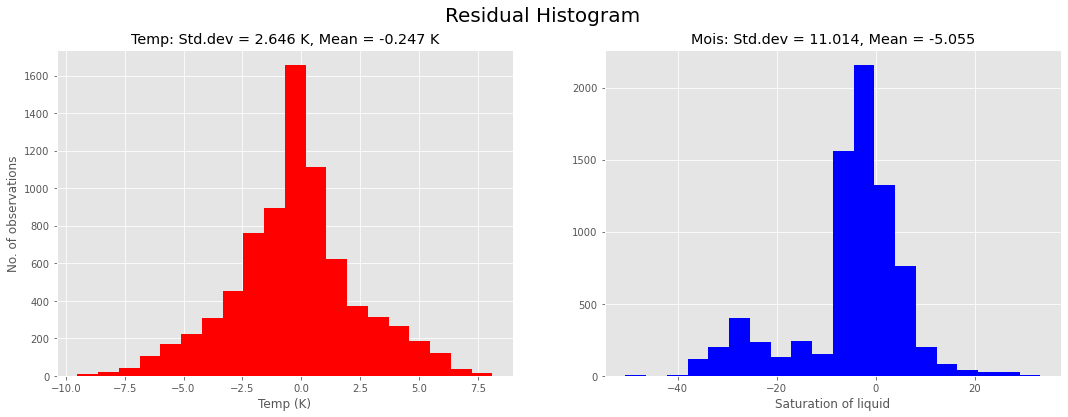

In [37]:
plt.style.use('ggplot')
plt.figure(figsize=(10,6))

fig, (ax1, ax2) = plt.subplots(1, 2)
fig.suptitle('Residual Histogram', fontsize=20)
fig.set_size_inches(18, 6)
ax1.hist(temp_res, bins=20, color='r')
ax2.hist(mois_res, bins=20, color='b')
ax1.set_ylabel('No. of observations')
ax1.set_title(f'Temp: Std.dev = {np.round(temp_res.std(),3)} K, Mean = {np.round(temp_res.mean(),3)} K')
ax2.set_title(f'Mois: Std.dev = {np.round(mois_res.std(),3)}, Mean = {np.round(mois_res.mean(),3)}')
ax1.set_xlabel('Temp (K)')
ax2.set_xlabel('Saturation of liquid')
plt.show()

**Comments:

1. The temperature observations show greater standard deviation compared to the moisture - Hence we need to consider to reweight the objective function. 
2.  The temperature is more or less equally distributed along the center. 
3. The moisture depicts a skew along the positive side of saturation of liquid. 

In [38]:
temp_res.describe()

count    7672.000000
mean       -0.247248
std         2.645670
min        -9.507847
25%        -1.736008
50%        -0.195929
75%         1.080709
max         8.128738
Name: Residual, dtype: float64

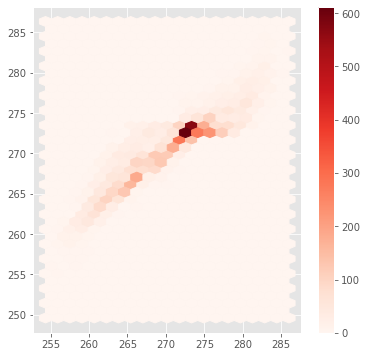

In [39]:
plt.figure(figsize=(6, 6))
plt.hexbin(temp_measured, temp_sim, gridsize=(20,20), cmap=plt.cm.Reds)
plt.colorbar()
plt.show()

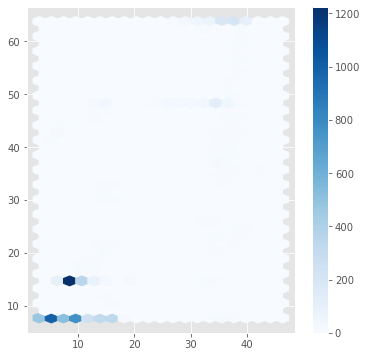

In [40]:
plt.figure(figsize=(6, 6))
plt.hexbin(mois_measured, mois_sim, gridsize=(20,20), cmap=plt.cm.Blues)
plt.colorbar()
plt.show()

Text(0.5, 1.0, 'Moisture')

<Figure size 720x432 with 0 Axes>

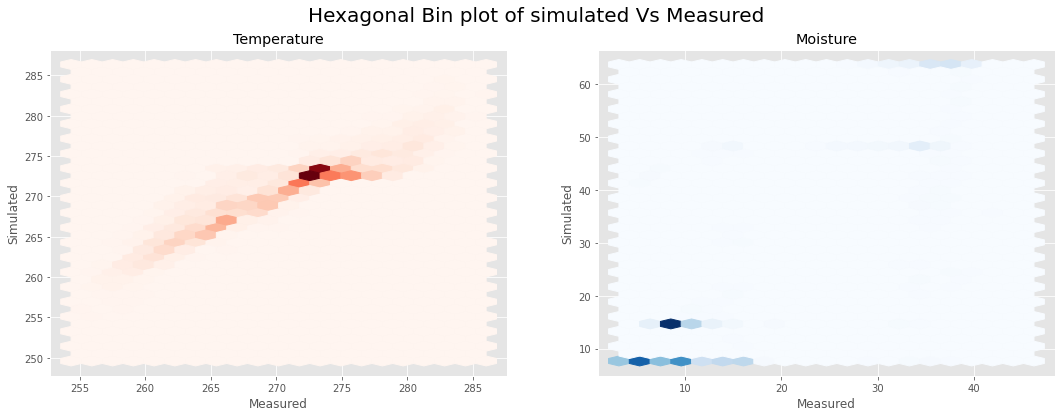

In [41]:
plt.style.use('ggplot')
plt.figure(figsize=(10,6))

fig, (ax1, ax2) = plt.subplots(1, 2)
fig.suptitle('Hexagonal Bin plot of simulated Vs Measured', fontsize=20)
fig.set_size_inches(18, 6)
ax1.hexbin(temp_measured, temp_sim, gridsize=(20,20), cmap=plt.cm.Reds)
#plt.colorbar()
ax1.set_ylabel('Simulated')
ax1.set_xlabel('Measured')
ax1.set_title('Temperature')

ax2.hexbin(mois_measured, mois_sim, gridsize=(20,20), cmap=plt.cm.Blues)
ax2.set_ylabel('Simulated')
ax2.set_xlabel('Measured')
ax2.set_title('Moisture')

#plt.colorbar(cax=ax1)

#ax1.hist(temp_res, bins=20, color='r')
#ax2.hist(mois_res, bins=20, color='b')
#ax1.set_ylabel('No. of observations')
#ax1.set_title(f'Temp: Std.dev = {np.round(temp_res.std(),3)} K, Mean = {np.round(temp_res.mean(),3)} K')
#ax2.set_title(f'Mois: Std.dev = {np.round(mois_res.std(),3)}, Mean = {np.round(mois_res.mean(),3)}')
#ax1.set_xlabel('Temp (K)')
#ax2.set_xlabel('Saturation of liquid')
#img1 = ax1.imshow(fig)
#fig.colorbar(img1)